# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [130]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [131]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries for splitting test and train data
from sklearn.model_selection import train_test_split

## Loading the dataset

In [132]:
df = pd.read_csv("../data/Loan_Modelling.csv")
df.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [133]:
# Create a copy of the datase
df_original = df.copy()

## Data Overview

* Observations
* Sanity checks

In [134]:
df.shape
print(f"The imported dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The imported dataset has 5000 rows and 14 columns


There are 5000 rows and 14 columns in the given dataset.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All columns including zipcode are numeric.

In [136]:
# Checking for null values in the dataset
df.isnull().values.any()

False

There is no null value in the dataset.

In [137]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


From the above statistical summary:
- Min `Experience` has a negative value.
- `Income`, `Age`, `CCAvg`, `Mortgage` are good. 
-  `ID` and `ZIPCode` can be dropped as they don't have any useful informaion.
- `Education`, `Securities_Account`, `CD_Account`, `Online`, `CreditCard` are categorical columns.
- 91% customers didn't accept personal loan offer in the first compaign.
- Min age is 23, max age is 67, average age is 45 years.
- 90% of the customers don't have a security account


In [138]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

We observe that:
- There are 5000 unique values in ID and hence can be dropped.
- As confirmed earlier, `Securities_Account`, `CD_Account`, `Online`, `CreditCard` have only 2 types of values (0 or 1)
- `Education` has 3 types of values.
- `ZIPCode` has 467 different numerical values. External library is required to interpret the zip code number. We will drop this column for now.

In [139]:
# Dropping ID and ZipCode columns
df.drop('ID', axis= 1)
df.drop('ZIPCode', axis= 1)

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,3,0.5,2,0,0,0,0,1,0


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [140]:
# identify the categorical columns and numerical columns
columns = list(df)
categorical_columns = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
numerical_columns = ['Age' , 'Experience', 'Income', 'CCAvg', 'Mortgage']

### Univariate Analysis on Continuous variables

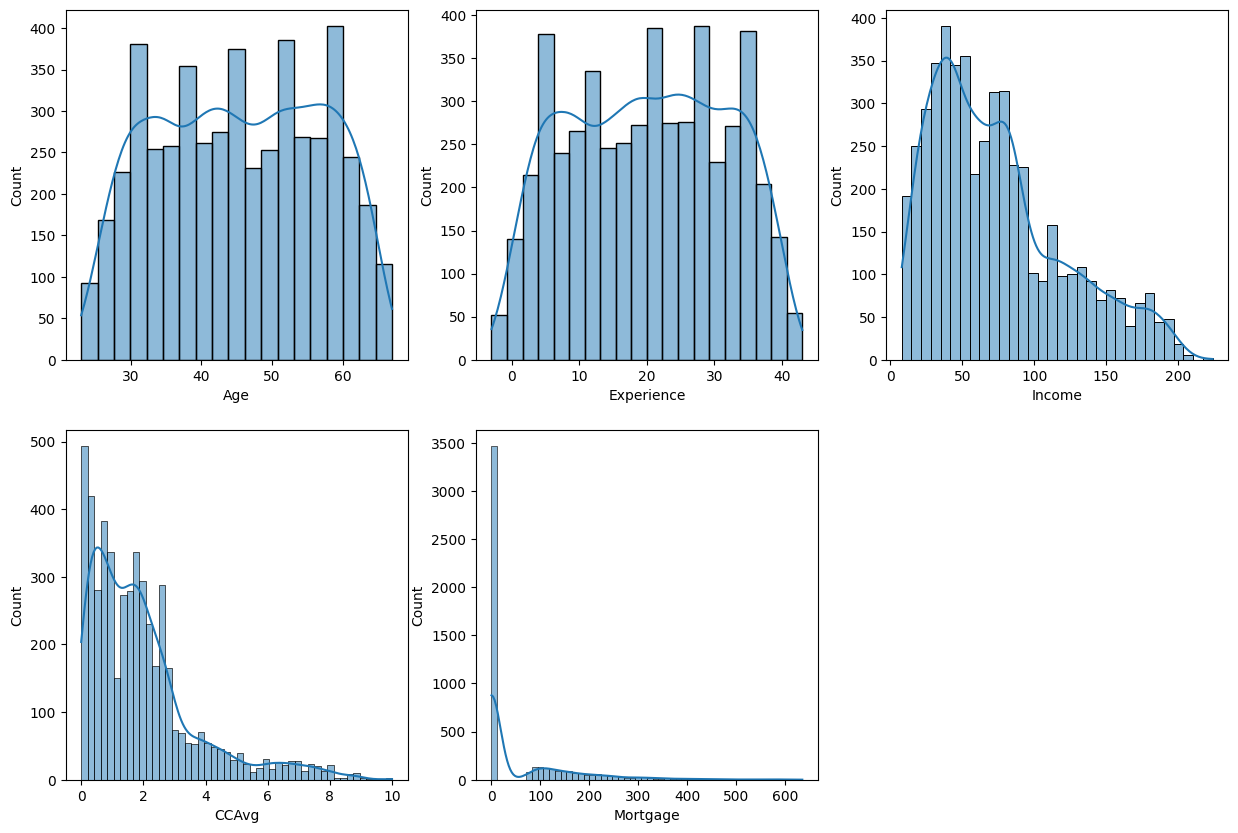

In [141]:
fig=plt.figure(figsize=(15,10))
for i, numerical_column in enumerate(numerical_columns):
    fig.add_subplot(2,3,i+1)
    sns.histplot(data=df[numerical_column],
                 kde= True)

We observe that:
- `Age` and `Experience` are uniformly distributed and look identical.
- `Income`, `CCAvg` and `Mortgage` are rightly skewed.
- `Mortgage` is rightly skewed showing that lot of people have a very low or no mortgage.

### Univariate Analysis for Categorical Variables

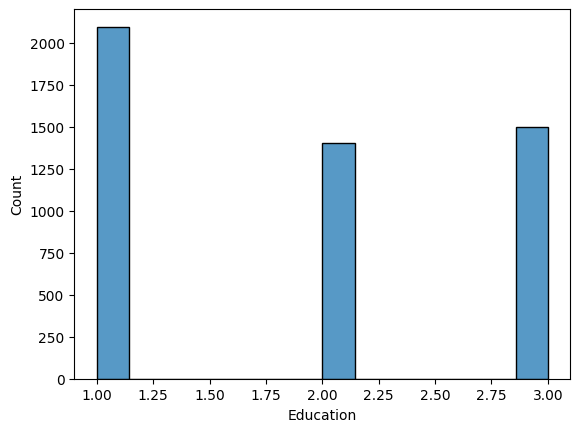

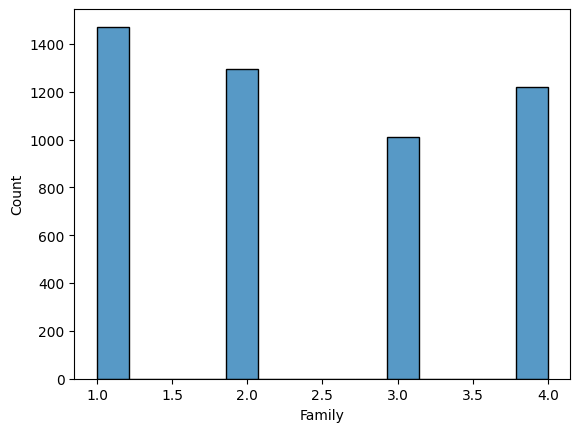

AttributeError: Rectangle.set() got an unexpected keyword argument 'ci'

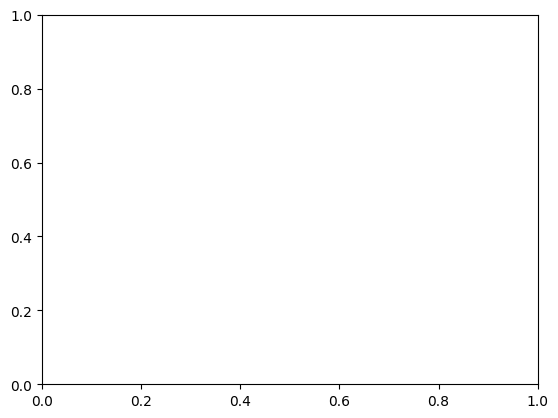

In [166]:
sns.histplot(data=df['Education'])
plt.show()
[ 'CD_Account', 'Online', 'CreditCard']
sns.histplot(data=df['Family'])
plt.show()


sns.histplot(data=df['Securities_Account'])
plt.show()

sns.histplot(data=df['Education'])
plt.show()
sns.histplot(data=df['CD_Account'])
plt.show()
sns.histplot(data=df['Online'])
plt.show()
sns.histplot(data=df['CreditCard'])
plt.show()

ValueError: num must be an integer with 1 <= num <= 2, not 3

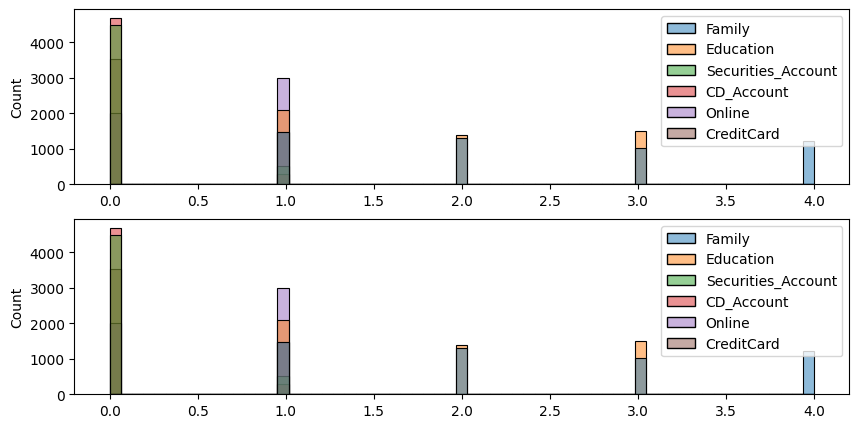

In [156]:
fig = plt.figure(figsize=(10,5))
for i,col in enumerate(categorical_columns):
    ax = fig.add_subplot(2,1,i+1)
    sns.histplot(data=df[categorical_columns])

### Checking data correlation

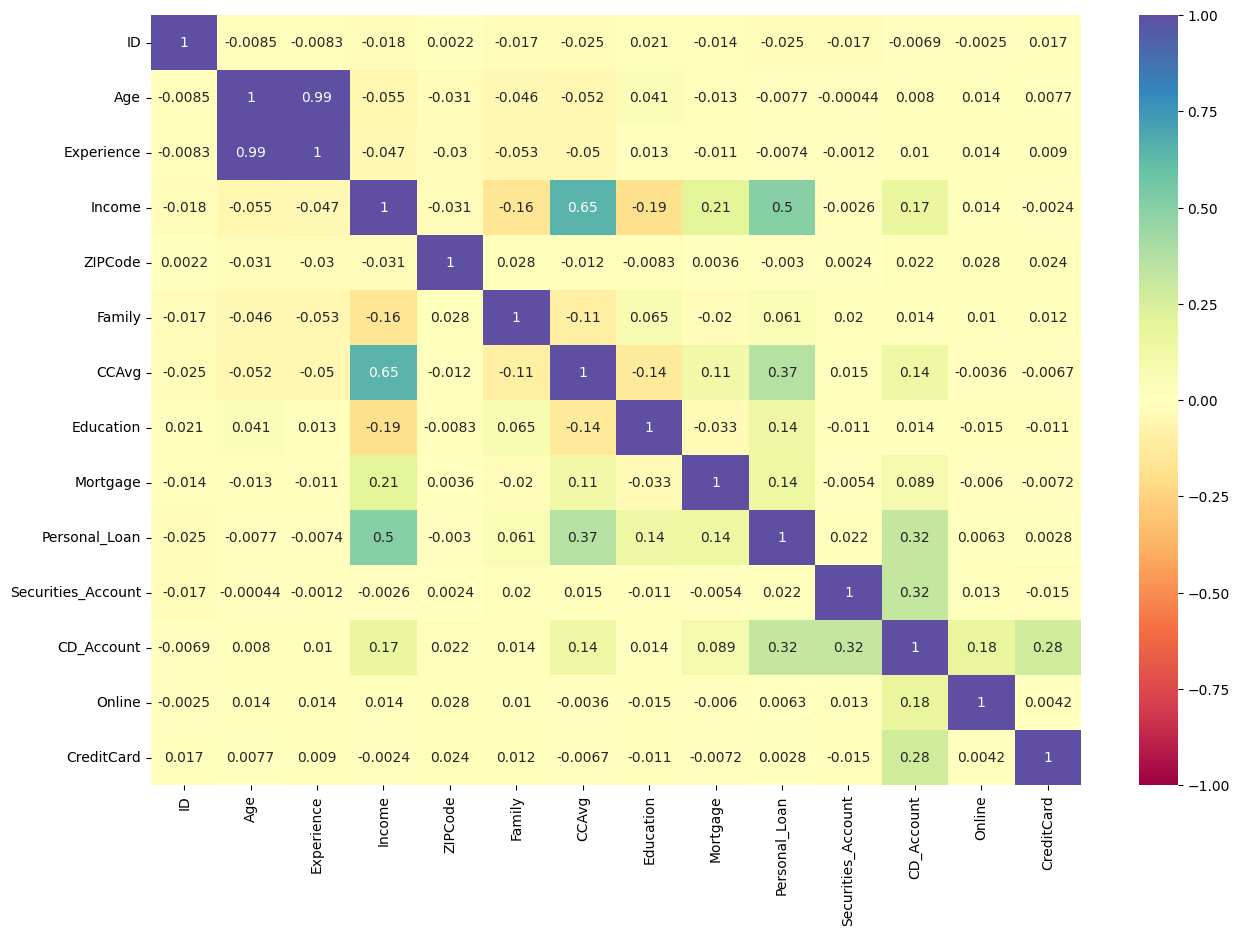

In [143]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    data = df[columns].corr(),
    annot=True,
    cmap= "Spectral",
    vmin=-1,
    vmax=1,
)
plt.show()

Observations:
- Age is very strongly correlated (0.99) to experience. We can use either of the variables for model building.
- Income has a positive association with credit card spending.
- Other variables are very weakly related.

In [144]:
df.drop("Experience", axis=1)

,ID,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,49,90034,3,0.5,2,0,0,0,0,1,0


Dropped `Experience` variable for model building as:
- It is very highly correlation with `Age`.
- The distribution is identical to `Age`.

### Create pairplot to check the relation between variables

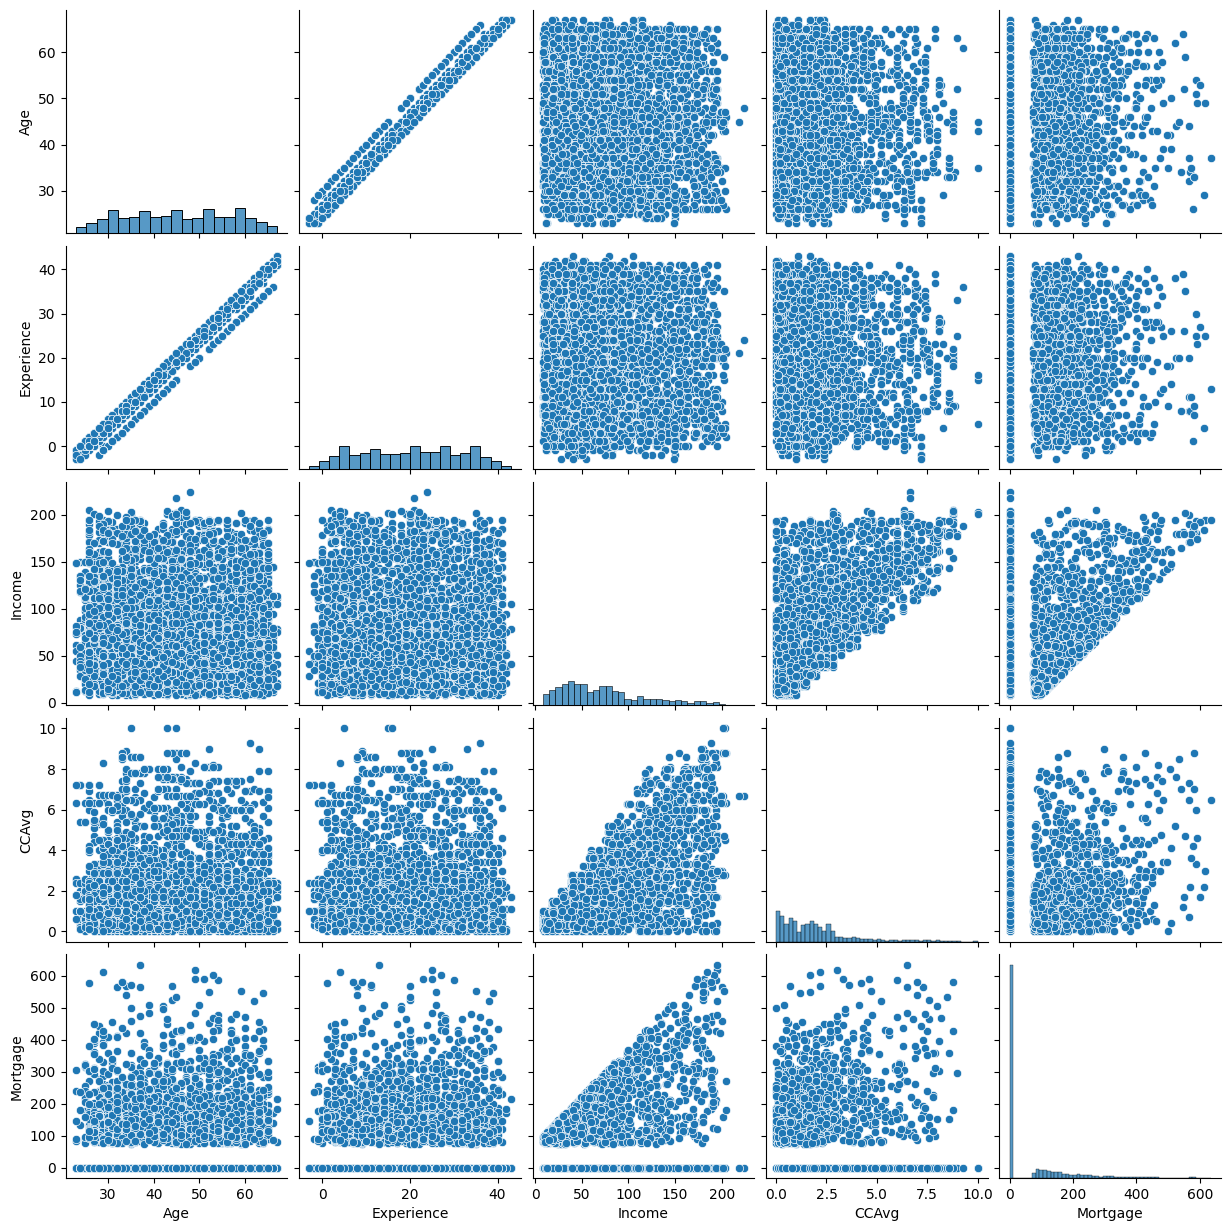

In [145]:
sns.pairplot(df[numerical_columns])

### Bivariate Analysis of numerical variables with target variable (personal loan)

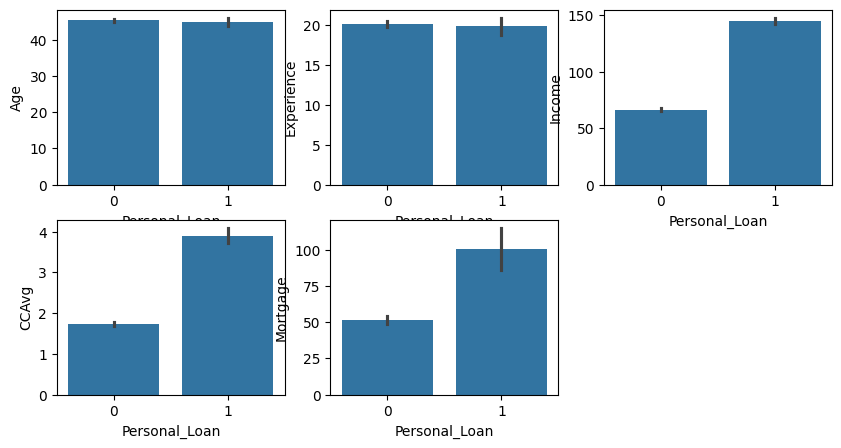

In [146]:
# Line plot to show relationship of personal loan with other variables
fig = plt.figure(figsize=(10,5))
for i,col in enumerate(numerical_columns):
    ax = fig.add_subplot(2,3,i+1)
    sns.barplot( x = df['Personal_Loan'], y = df[col])

Customers with higher income took personal loan in the last compaign.
Customers with more than 2 family members took personal loan in the last compaign

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [147]:
# Missing values treatment
df.isnull().values.any()

False

We already verified there are no missing values in any of the columns. 
However, some of `Experience` values are negative that doesn't look right.

# Feature engineering

# Outlier detection

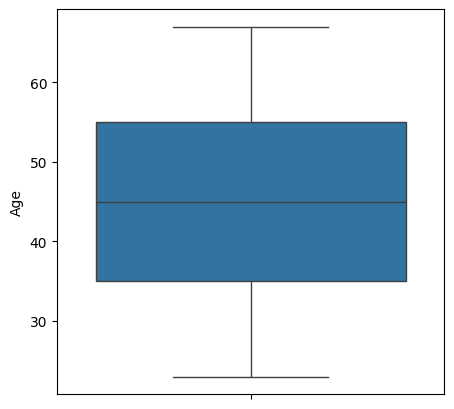

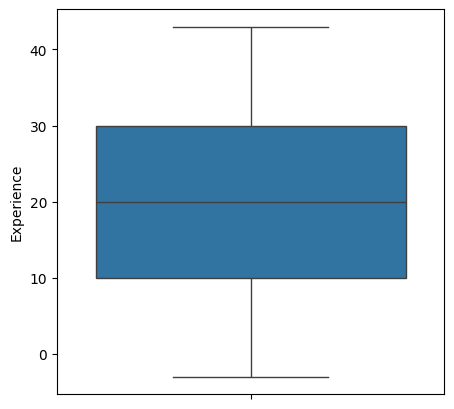

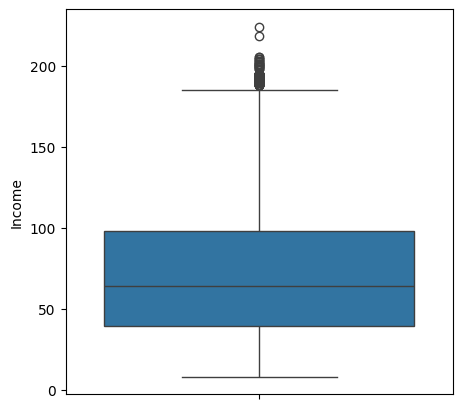

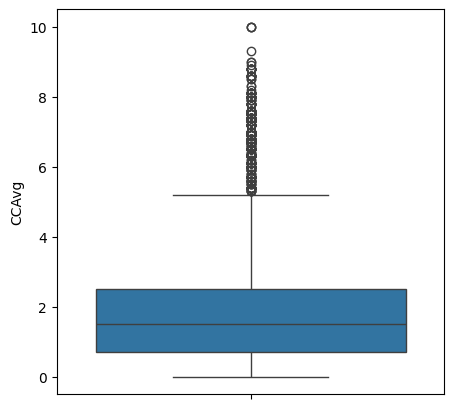

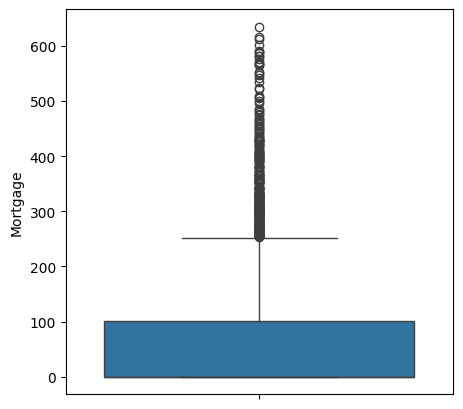

In [148]:
for numerical_column in numerical_columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(data=df, 
                y=numerical_column, 
                showfliers= True)
    plt.ylabel(numerical_column)
    plt.show()

We observe that `CC Avg`, `Income` and `Mortgage` have a number of outliers on the higher side.

## Model Building

### Model Evaluation Criterion

### Model Building

### Model Performance Improvement

## Model Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___